In [1]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv
import time
import csv
import os
import numpy as np

In [2]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions
# mp_hands = mp.solutions.hands

# Test Detection & Make Landmark

In [4]:
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)

# Initiate holistic model
prevTime = 0
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        ###
        initialTime = time.time()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        ### First point
        firstTime = time.time() - initialTime
        cv2.putText(image, f'1: {round(firstTime,3)}', (20,100), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        ### Seocnd point
        secondTime = time.time() - initialTime
        cv2.putText(image, f'2: {round(secondTime,3)}', (20,150), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        # Calculate FPS
        currTime = time.time()
        fps = 1 / (currTime - prevTime)
        prevTime = currTime
        cv2.putText(image, f'FPS: {round(fps,3)}', (20,40), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [3]:
# num_pose_coords = len(results.pose_landmarks.landmark)
# num_pose_coords

In [4]:
num_pose_coords = 22
num_pose_coords

22

In [5]:
# "LEFT" hand coords
# num_left_hand_coords = len(results.right_hand_landmarks.landmark)
num_left_hand_coords = 20
num_left_hand_coords

20

In [6]:
# "RIGHT" hand coords
# num_right_hand_coords = len(results.left_hand_landmarks.landmark)
num_right_hand_coords = 20
num_right_hand_coords

20

In [7]:
num_hand_coords = num_right_hand_coords + num_left_hand_coords
num_hand_coords

40

In [8]:
num_pose_hand_coords = num_pose_coords + num_right_hand_coords + num_left_hand_coords
num_pose_hand_coords

62

In [9]:
# num_face_coords = len(results.face_landmarks.landmark)
num_face_coords = 467
num_face_coords

467

In [10]:
# pose_hand_landmarks = ['class']
# for val in range(1, num_pose_hand_coords+1):
#     pose_hand_landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [11]:
face_landmarks = ['class']
for val in range(1, num_face_coords+1):
    face_landmarks += ['x{}'.format(val), 'y{}'.format(val)]

In [12]:
# pose_landmarks = ['class']
# for val in range(1, num_pose_coords+1):
#     pose_landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [13]:
# hand_landmarks = ['class']
# for val in range(1, num_hand_coords+1):
#     hand_landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]

In [14]:
pose_hand_landmarks = ['class']
for val in range(1, num_pose_coords+1):
    pose_hand_landmarks += ['x{}'.format(val), 'y{}'.format(val)]
for val in range(num_pose_coords+1, num_pose_coords+num_hand_coords+1):
    pose_hand_landmarks += ['x{}'.format(val), 'y{}'.format(val)]

# Set the Directory Path

In [10]:
path_rawData = ".//rawData"
path_model = ".//model"

# Pose & Hand Recording

In [16]:
# with open('sample.csv', mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(pose_hand_landmarks)

In [17]:
pose_hand_file = '//210923pose_hand_sample.csv'
with open(path_rawData + pose_hand_file, mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(pose_hand_landmarks)

In [44]:
class_name = "11"

In [45]:
### Revise one
### Remove unnecessary value & Hand Coordinate Move

start = False
waiting = False
checker = False
waiting_time = time.time()
max_time_end = time.time()
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        if start:
            # Export coordinates
            try:
                # Extract Pose landmarks
                pose = results.pose_landmarks.landmark
                pose_row = list(np.array([[pose[i].x-pose[0].x, pose[i].y-pose[0].y] 
                                          for i in range(1, num_pose_coords+1)]).flatten())
                try:
                    # Extract "RIGHT" Hand lanmarks
                    righthand = results.left_hand_landmarks.landmark
                    righthand_row = list(np.array([[righthand[i].x - righthand[0].x, righthand[i].y - righthand[0].y]
                                                   for i in range(1,num_right_hand_coords+1)]).flatten())
                except:
                    righthand_row = [0 for i in range(num_right_hand_coords*2)]

                try:
                    # Extract "LEFT" Hand lanmarks
                    lefthand = results.right_hand_landmarks.landmark
                    lefthand_row = list(np.array([[lefthand[i].x - lefthand[0].x, lefthand[i].y - lefthand[0].y]
                                                  for i in range(1,num_left_hand_coords+1)]).flatten())
                except:
                    lefthand_row = [0 for i in range(num_left_hand_coords*2)]
                        
                
                # Concate rows
                row = pose_row + righthand_row + lefthand_row

                # Append class name 
                row.insert(0, class_name)
            

                # Export to CSV
                with open(path_rawData + pose_hand_file, mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)
            except:
                pass
                        
        cv2.imshow('Gather Pose Data', image)
        
        # r키를 눌러서 녹화 시작 - 20초간 녹화
        if cv2.waitKey(10) & 0xFF == ord('r'):
            print("Wait 3 seconds")
            waiting_time = time.time() + (3)
            checker = True
            
        if time.time() > waiting_time and checker == True:
            waiting = True
            checker = False
                
        if waiting:
            print("Recording Start!")
            max_time_end = time.time() + (60)
            start = True
            waiting = False
        
        # r키를 눌러서 녹화 시작 후 30초 후에 녹화 종료
        if time.time() > max_time_end and start == True:
            start = False
            break
        
        # q키를 눌러서 강제로 녹화 종료 가능
        if cv2.waitKey(10) & 0xFF == ord('q'):
            start = False
            break

cap.release()
cv2.destroyAllWindows()

Wait 3 seconds
Recording Start!


In [ ]:
# ### Revise one

# start = False
# waiting = False
# checker = False
# waiting_time = time.time()
# max_time_end = time.time()
# cap = cv2.VideoCapture(0)
# cap.set(3, 1280)
# cap.set(4, 720)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = cv2.flip(image, 1)
#         image.flags.writeable = False
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )

#         # 4. Pose Detections
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                  )
        
#         if start:
#             # Export coordinates
#             try:
#                 # Extract Pose landmarks
#                 pose = results.pose_landmarks.landmark
#                 pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten()) 
                
#                 try:
#                     # Extract "RIGHT" Hand lanmarks
#                     righthand = results.left_hand_landmarks.landmark
#                     righthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in righthand]).flatten())
#                 except:
#                     righthand_row = [0 for i in range(num_right_hand_coords*3)]

#                 try:
#                     # Extract "LEFT" Hand lanmarks
#                     lefthand = results.right_hand_landmarks.landmark
#                     lefthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in lefthand]).flatten())
#                 except:
#                     lefthand_row = [0 for i in range(num_left_hand_coords*3)]
                        
                
#                 # Concate rows
#                 row = pose_row + righthand_row + lefthand_row

#                 # Append class name 
#                 row.insert(0, class_name)
            

#                 # Export to CSV
#                 with open(path_rawData + pose_hand_file, mode='a', newline='') as f:
#                     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                     csv_writer.writerow(row)
#             except:
#                 pass
                        
#         cv2.imshow('Gather Pose Data', image)
        
#         # r키를 눌러서 녹화 시작 - 20초간 녹화
#         if cv2.waitKey(10) & 0xFF == ord('r'):
#             print("Wait 3 seconds")
#             waiting_time = time.time() + (3)
#             checker = True
            
#         if time.time() > waiting_time and checker == True:
#             waiting = True
#             checker = False
                
#         if waiting:
#             print("Recording Start!")
#             max_time_end = time.time() + (10)
#             start = True
#             waiting = False
        
#         # r키를 눌러서 녹화 시작 후 30초 후에 녹화 종료
#         if time.time() > max_time_end and start == True:
#             start = False
#             break
        
#         # q키를 눌러서 강제로 녹화 종료 가능
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             start = False
#             break

# cap.release()
# cv2.destroyAllWindows()

In [36]:
# ### 손 하나가 안보이면 예외처리가 되는 에러

# start = False
# max_time_end = time.time()
# cap = cv2.VideoCapture(0)
# cap.set(3, 1280)
# cap.set(4, 720)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = cv2.flip(image, 1)
#         image.flags.writeable = False
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
# #         # 1. Draw face landmarks
# #         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
# #                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
# #                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
# #                                  )
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )

#         # 4. Pose Detections
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                  )
        
#         if start:
#             # Export coordinates
#             try:
#                 # Extract Pose landmarks
#                 pose = results.pose_landmarks.landmark
#                 pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())

# #                 # Extract Face landmarks
# #                 face = results.face_landmarks.landmark
# #                 face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
                
#                 # Extract "RIGHT" Hand lanmarks
#                 righthand = results.left_hand_landmarks.landmark
#                 righthand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in righthand]).flatten())
                
#                 # Extract "LEFT" Hand lanmarks
#                 lefthand = results.right_hand_landmarks.landmark
#                 lefthand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in lefthand]).flatten())
                
#                 # Concate rows
#                 row = pose_row + righthand_row + lefthand_row
 
#                 # Append class name 
#                 row.insert(0, class_name)
                
#                 # Export to CSV
#                 with open('pose_hand_sample.csv', mode='a', newline='') as f:
#                     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                     csv_writer.writerow(row)

#             except:
#                 pass
                        
#         cv2.imshow('Gather Pose Data', image)
        
#         # r키를 눌러서 녹화 시작 - 20초간 녹화
#         if cv2.waitKey(10) & 0xFF == ord('r'):
#             print("Recording Start!")
#             max_time_end = time.time() + (5)
#             start = True
        
#         # r키를 눌러서 녹화 시작 후 15초 후에 녹화 종료
#         if time.time() > max_time_end and start == True:
#             start = False
#             break
        
#         # q키를 눌러서 강제로 녹화 종료 가능
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             start = False
#             break

# cap.release()
# cv2.destroyAllWindows()

Recording Start!


# Hand Recording

In [73]:
# hand_file = '//210910hand_sample.csv'
# with open(path_rawData+fileName, mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(hand_landmarks)

In [74]:
# class_name = "0"

In [26]:
# ### Revise one

# start = False
# waiting = False
# checker = False
# right = True
# left = True

# waiting_time = time.time()
# max_time_end = time.time()
# cap = cv2.VideoCapture(0)
# cap.set(3, 1280)
# cap.set(4, 720)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = cv2.flip(image, 1)
#         image.flags.writeable = False
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )
        
# #         righthand = results.left_hand_landmarks.landmark
# #         for landmark in righthand:
# #             print(landmark)
        
#         if start:
#             # Export coordinates
#             try:
                
#                 try:
#                     # Extract "RIGHT" Hand lanmarks
#                     righthand = results.left_hand_landmarks.landmark
#                     righthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in righthand]).flatten())
#                     right = True
#                 except:
#                     righthand_row = [0 for i in range(num_right_hand_coords*3)]
#                     right = False

#                 try:
#                     # Extract "LEFT" Hand lanmarks
#                     lefthand = results.right_hand_landmarks.landmark
#                     lefthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in lefthand]).flatten())
#                     left = True
#                 except:
#                     lefthand_row = [0 for i in range(num_left_hand_coords*3)]
#                     left = False
                
#                 if right != False or left != False:
#                     # Concate rows
#                     row = righthand_row + lefthand_row

#                     # Append class name 
#                     row.insert(0, class_name)


#                     # Export to CSV
#                     with open(path_rawData + hand_file, mode='a', newline='') as f:
#                         csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                         csv_writer.writerow(row)
                        
#             except:
#                 pass
                        
#         cv2.imshow('Gather Pose Data', image)
        
#         # r키를 눌러서 녹화 시작 - 20초간 녹화
#         if cv2.waitKey(10) & 0xFF == ord('r'):
#             print("Wait 3 seconds")
#             waiting_time = time.time() + (3)
#             checker = True
            
#         if time.time() > waiting_time and checker == True:
#             waiting = True
#             checker = False
                
#         if waiting:
#             print("Recording Start!")
#             max_time_end = time.time() + (10)
#             start = True
#             waiting = False
        
#         # r키를 눌러서 녹화 시작 후 30초 후에 녹화 종료
#         if time.time() > max_time_end and start == True:
#             start = False
#             break
        
#         # q키를 눌러서 강제로 녹화 종료 가능
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             start = False
#             break

# cap.release()
# cv2.destroyAllWindows()

# Face Recording

In [46]:
face_file = '//210923face_sample.csv'
with open(path_rawData + face_file, mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(face_landmarks)

In [53]:
class_name = "2"

In [ ]:
start = False
max_time_end = time.time()
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        if start:
            # Export coordinates
            try:
                # Extract Face landmarks
                face = results.face_landmarks.landmark
#                 face_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in face]).flatten())            
                face_row = list(np.array([[face[i].x-face[0].x, face[i].y-face[0].y] 
                                          for i in range(1, num_face_coords+1)]).flatten())
                # Concate rows
                row = face_row

                # Append class name 
                row.insert(0, class_name)

                # Export to CSV
                with open(path_rawData + face_file, mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)

            except:
                pass
                        
        cv2.imshow('Gather Pose Data', image)
        
        # r키를 눌러서 녹화 시작 - 20초간 녹화
        if cv2.waitKey(10) & 0xFF == ord('r'):
            print("Recording Start!")
            max_time_end = time.time() + (60)
            start = True
        
        # r키를 눌러서 녹화 시작 후 15초 후에 녹화 종료
        if time.time() > max_time_end and start == True:
            start = False
            break
        
        # q키를 눌러서 강제로 녹화 종료 가능
        if cv2.waitKey(10) & 0xFF == ord('q'):
            start = False
            break

cap.release()
cv2.destroyAllWindows()

Recording Start!


# Train Custom Model Using Scikit Learn

In [11]:
# Read in Collected Data and Process
import pandas as pd
from sklearn.model_selection import train_test_split

# Train Machine Learning Classification Model
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Evaluate and Serialize Model
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

### Read in Collected Data and Process

In [12]:
pose_hand_df = pd.read_csv(path_rawData + '//210923pose_hand_sample.csv')
face_df = pd.read_csv(path_rawData + '//210923face_sample.csv')

In [13]:
# Remove NaN Value
pose_hand_df = pose_hand_df.dropna(axis=0)
face_df = face_df.dropna(axis=0)

In [14]:
pose_hand_df.head()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62
0,0,0.025083,-0.059034,0.039393,-0.057313,0.055290,-0.054464,-0.018622,-0.058064,-0.034089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.025074,-0.059305,0.039415,-0.057535,0.055290,-0.054740,-0.018624,-0.058333,-0.034094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.025199,-0.059194,0.039933,-0.057321,0.055589,-0.054557,-0.018631,-0.058238,-0.034063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.025481,-0.059034,0.040558,-0.056926,0.055994,-0.054120,-0.018528,-0.058417,-0.033989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.025545,-0.058822,0.040617,-0.056585,0.056059,-0.053748,-0.018436,-0.058255,-0.033882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
pose_hand_df.tail()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62
14375,11,0.019277,-0.066205,0.032651,-0.067613,0.046602,-0.068700,-0.021424,-0.064312,-0.036063,...,-0.022804,-0.410140,-0.015810,-0.139389,-0.020294,-0.217787,-0.022401,-0.273714,-0.025029,-0.325658
14376,11,0.022400,-0.065209,0.036403,-0.066800,0.049869,-0.068027,-0.016608,-0.062449,-0.029509,...,-0.017927,-0.404405,-0.030770,-0.149569,-0.029478,-0.220804,-0.031249,-0.275749,-0.034521,-0.330359
14377,11,0.021808,-0.064016,0.035822,-0.066081,0.049147,-0.067499,-0.017348,-0.059999,-0.030182,...,-0.005212,-0.265429,0.011473,-0.045664,0.007742,-0.088030,0.002118,-0.139119,-0.003976,-0.184678
14378,11,0.024261,-0.064245,0.038799,-0.066328,0.052088,-0.067735,-0.015455,-0.060111,-0.027607,...,-0.001512,-0.266153,0.004391,-0.084261,0.001335,-0.128796,0.001184,-0.162640,0.000467,-0.192835
14379,11,0.024219,-0.064216,0.039069,-0.066313,0.052063,-0.067910,-0.015481,-0.059526,-0.027401,...,-0.001372,-0.255327,-0.013953,-0.073642,-0.016034,-0.115377,-0.018642,-0.152313,-0.023072,-0.193048


In [16]:
face_df.head()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x463,y463,x464,y464,x465,y465,x466,y466,x467,y467
0,0,-0.000892,-0.038317,-0.000280,-0.024701,-0.006423,-0.083888,-0.000919,-0.052657,-0.000680,...,0.020560,-0.117100,0.016020,-0.114078,0.013456,-0.112093,0.055111,-0.123842,0.058939,-0.128796
1,0,-0.000933,-0.037787,-0.000265,-0.024427,-0.006384,-0.083361,-0.000942,-0.052125,-0.000645,...,0.021331,-0.116520,0.016646,-0.113521,0.013970,-0.111526,0.056479,-0.123409,0.060355,-0.128333
2,0,-0.000949,-0.039156,-0.000288,-0.025428,-0.006475,-0.085115,-0.000972,-0.053623,-0.000719,...,0.020734,-0.118442,0.016143,-0.115412,0.013547,-0.113411,0.055421,-0.124895,0.059262,-0.129598
3,0,-0.000915,-0.038084,-0.000302,-0.024576,-0.006340,-0.083803,-0.000917,-0.052483,-0.000643,...,0.020769,-0.116970,0.016194,-0.113981,0.013599,-0.112002,0.055426,-0.123677,0.059277,-0.128500
4,0,-0.000876,-0.038421,-0.000302,-0.024874,-0.006476,-0.084158,-0.000912,-0.052829,-0.000696,...,0.020547,-0.117531,0.015979,-0.114482,0.013397,-0.112454,0.055138,-0.123982,0.058973,-0.128909


In [17]:
face_df.tail()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x463,y463,x464,y464,x465,y465,x466,y466,x467,y467
2689,2,-0.001808,-0.046406,-0.000851,-0.030119,-0.007938,-0.089262,-0.002055,-0.060676,-0.002074,...,0.018402,-0.119793,0.014067,-0.116629,0.011597,-0.114865,0.052062,-0.124677,0.056115,-0.131262
2690,2,-0.001805,-0.046249,-0.000818,-0.030200,-0.007844,-0.089437,-0.002045,-0.060539,-0.002018,...,0.018644,-0.120476,0.014259,-0.117270,0.011777,-0.115438,0.052397,-0.125323,0.056430,-0.131736
2691,2,-0.001812,-0.046186,-0.000883,-0.029914,-0.007905,-0.089032,-0.002056,-0.060458,-0.002071,...,0.018233,-0.119424,0.013900,-0.116284,0.011454,-0.114549,0.051747,-0.124317,0.055743,-0.130605
2692,2,-0.001864,-0.046390,-0.000939,-0.030233,-0.007985,-0.089217,-0.002104,-0.060635,-0.002127,...,0.018123,-0.119672,0.013840,-0.116521,0.011405,-0.114759,0.051713,-0.124582,0.055724,-0.131030
2693,2,-0.001903,-0.045487,-0.000920,-0.029627,-0.008047,-0.088279,-0.002148,-0.059652,-0.002167,...,0.018270,-0.119133,0.013956,-0.115908,0.011488,-0.114088,0.051983,-0.124432,0.056026,-0.130834


In [18]:
pose_hand_X = pose_hand_df.drop('class', axis=1) # features
pose_hand_y = pose_hand_df['class'] # target value
face_X = face_df.drop('class', axis=1) # features
face_y = face_df['class'] # target value

In [19]:
pose_hand_X_train, pose_hand_X_test, pose_hand_y_train, pose_hand_y_test = train_test_split(pose_hand_X, pose_hand_y, stratify=pose_hand_y, test_size=0.25, random_state=1234)
face_X_train, face_X_test, face_y_train, face_y_test = train_test_split(face_X, face_y, stratify=face_y, test_size=0.25, random_state=1234)

In [20]:
pose_hand_y_train.value_counts()

3     1349
9     1347
1     1347
2     1346
0      676
4      675
5      675
7      675
8      675
11     674
6      673
10     673
Name: class, dtype: int64

In [21]:
pose_hand_y_test.value_counts()

3     450
2     449
1     449
9     449
8     225
5     225
7     225
0     225
4     225
11    225
6     224
10    224
Name: class, dtype: int64

In [22]:
face_y_train.value_counts()

2    674
0    673
1    673
Name: class, dtype: int64

In [23]:
face_y_test.value_counts()

2    225
0    225
1    224
Name: class, dtype: int64

### Train Machine Learning Classificaiton Model for pose_hand

In [24]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'sv':make_pipeline(StandardScaler(), SVC()),
}

In [25]:
pose_hand_fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(pose_hand_X_train, pose_hand_y_train)
    pose_hand_fit_models[algo] = model

C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
pose_hand_fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'sv': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])}

In [27]:
pose_hand_fit_models['sv'].predict(pose_hand_X_test)

array([3, 6, 2, ..., 3, 3, 0], dtype=int64)

In [28]:
# Test for pose_hand_fit_models
for algo, model in pose_hand_fit_models.items():
    pred = model.predict(pose_hand_X_test)
    print(algo, accuracy_score(pose_hand_y_test, pred))

lr 0.9997218358831711
rc 0.9991655076495132
rf 0.9997218358831711
gb 0.9991655076495132
sv 0.9997218358831711


In [29]:
# Export pose_hand_fit_models
modelName = '//210923pose_hand.pkl'
with open(path_model + modelName, 'wb') as f:
    pickle.dump(pose_hand_fit_models['rf'], f)

### Train Machine Learning Classificaiton Model for face

In [30]:
face_fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(face_X_train, face_y_train)
    face_fit_models[algo] = model

C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
face_fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'sv': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])}

In [32]:
# Test for face_fit_models
for algo, model in face_fit_models.items():
    pred = model.predict(face_X_test)
    print(algo, accuracy_score(face_y_test, pred))

lr 1.0
rc 1.0
rf 1.0
gb 0.9985163204747775
sv 1.0


In [33]:
# Export pose_hand_fit_models
modelName = '//210923face.pkl'
with open(path_model + modelName, 'wb') as f:
    pickle.dump(face_fit_models['rf'], f)

# Test DEMO

In [35]:
#######################
### Make Code Clear ###
#######################

mp_holistic = mp.solutions.holistic  # Mediapipe Solutions

pose_hand_model = "//210923pose_hand.pkl"
face_model = "//210923face.pkl"

# Load Model
with open(path_model + pose_hand_model, 'rb') as f:
    pose_hand_model = pickle.load(f)
with open(path_model + face_model, 'rb') as f:
    face_model = pickle.load(f)


cap = cv2.VideoCapture(0)
cap.set(3, 1280)
cap.set(4, 720)
prevTime = 0
readData = True

# def sample(x,y):
#     return x,y

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Start point: Timer for make dataframe
        if readData:
            beginTime = time.time()
            readData = False
        
        ### Start point: Timer for Debugging
        initialTime = time.time()

        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False        
        
        # Make Detectionsq
        results = holistic.process(image)
                
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # --------------------------------------------------------------------------------------------- #
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # --------------------------------------------------------------------------------------------- #
        
        
        # Export Pose-Hand coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[pose[i].x-pose[0].x, pose[i].y-pose[0].y] 
                          for i in range(1, num_pose_coords+1)]).flatten())
            # Extract "RIGHT" Hand lanmarks
            try:
                righthand = results.left_hand_landmarks.landmark
                righthand_row = list(np.array([[righthand[i].x - righthand[0].x, righthand[i].y - righthand[0].y]
                               for i in range(1,num_right_hand_coords+1)]).flatten())
            except:
                righthand_row = [0 for i in range(num_right_hand_coords*2)]

            # Extract "LEFT" Hand lanmarks
            try:
                lefthand = results.right_hand_landmarks.landmark
                lefthand_row = list(np.array([[lefthand[i].x - lefthand[0].x, lefthand[i].y - lefthand[0].y]
                                                  for i in range(1,num_left_hand_coords+1)]).flatten())
            except:
                lefthand_row = [0 for i in range(num_left_hand_coords*2)]
            
            # Concate rows
            pose_hand_row = pose_row+righthand_row+lefthand_row
            
            # Make Prediction
            pose_hand_class = pose_hand_model.predict([pose_hand_row])[0]
            pose_hand_prob = pose_hand_model.predict_proba([pose_hand_row])[0]
                     
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(pose_hand_class)
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(pose_hand_prob[np.argmax(pose_hand_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        except:
            pass
            
        # Export Face coordinates
        try:
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[face[i].x - face[0].x, face[i].y - face[0].y]
                                                  for i in range(1,num_face_coords+1)]).flatten())
            
            
            # Make Prediction
            face_class = face_model.predict([face_row])[0]
            face_prob = face_model.predict_proba([face_row])[0]
            
            
            # Get status box
            cv2.rectangle(image, (250,0), (500, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (345,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, face_class.split(' ')[0]
                        , (340,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (265,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(face_prob[np.argmax(face_prob)],2))
                        , (260,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        except:
            pass
        
        # Calculate FPS
        currTime = time.time()
        fps = 1 / (currTime - prevTime)
        prevTime = currTime
        cv2.putText(image, f'FPS: {round(fps,3)}', (20,100), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# Virtual Cam DEMO

In [202]:
# Load Pose_Hand_Images with Array Test
from PIL import Image
import os, os.path

pose_hand_imgs = []
path = "./effect/sample/"
fileType = '.png'
fileList = os.listdir(path)
fileList.sort()
print(fileList)
for i in range(0,20):
    imgs.append(Image.open(path+str(i)+fileType))

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './effect/sample/'

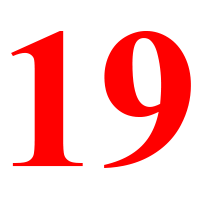

In [330]:
imgs[19]

In [ ]:
# VirtualCam DEMO